In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import permutations
import warnings
import matplotlib.pyplot as plt

Analisa:
Pada kode program ini dilakukan proses import atau pemanggilan beberapa library yang dibutuhkan untuk analisis data dan visualisasi hasil.

NumPy (import numpy as np) digunakan untuk melakukan perhitungan numerik seperti operasi matematika, statistik, serta pengolahan data dalam bentuk array atau matriks.

Pandas (import pandas as pd) berfungsi untuk membaca, mengolah, dan menganalisis data dalam bentuk tabel (DataFrame), misalnya dari file CSV atau Excel.

Seaborn (import seaborn as sns) digunakan untuk membuat visualisasi data yang lebih menarik dan informatif, seperti grafik hubungan antar variabel atau distribusi data.

from itertools import permutations berfungsi untuk menghasilkan semua kemungkinan urutan (permutasi) dari suatu kumpulan data, yang sering digunakan dalam analisis kombinatorial.

Warnings (import warnings) digunakan untuk mengatur tampilan pesan peringatan agar tidak mengganggu hasil output program.

Matplotlib (import matplotlib.pyplot as plt) berfungsi untuk membuat berbagai jenis grafik seperti diagram garis, batang, maupun sebar (scatter plot) untuk membantu memahami pola dalam data.

In [2]:
warnings.filterwarnings('ignore')

iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Analisa:
Potongan kode tersebut berfungsi untuk memuat dataset *Iris* yang akan digunakan dalam proses analisis data. Baris `warnings.filterwarnings('ignore')` digunakan untuk menyembunyikan pesan peringatan agar hasil keluaran program terlihat lebih bersih dan tidak terganggu oleh notifikasi sistem. Selanjutnya, perintah `iris_df = sns.load_dataset('iris')` memanggil dataset *Iris* bawaan dari library Seaborn yang berisi data pengukuran bunga *Iris*, meliputi panjang dan lebar kelopak (*sepal*) serta panjang dan lebar mahkota (*petal*) dari tiga jenis spesies bunga, yaitu *setosa*, *versicolor*, dan *virginica*. Terakhir, `iris_df.head()` digunakan untuk menampilkan lima baris pertama dari dataset tersebut guna memastikan bahwa data berhasil dimuat dan untuk memberikan gambaran awal mengenai struktur data yang akan dianalisis.


In [3]:
X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y_true_names = iris_df['species'].values

species_map = {name: i for i, name in enumerate(np.unique(y_true_names))}
y_true = np.array([species_map[name] for name in y_true_names])

print("Data Iris berhasil dimuat.")
print(f"Bentuk data fitur (X): {X.shape}")
print(f"Contoh 5 baris pertama data:\n{X[:5]}\n")

Data Iris berhasil dimuat.
Bentuk data fitur (X): (150, 4)
Contoh 5 baris pertama data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]



Analisa: Potongan kode tersebut digunakan untuk memisahkan antara data fitur dan label dari dataset *Iris*. Pada baris pertama, variabel `X` diisi dengan empat kolom numerik yang mewakili karakteristik bunga *Iris*, yaitu panjang dan lebar kelopak (*sepal_length*, *sepal_width*) serta panjang dan lebar mahkota (*petal_length*, *petal_width*). Data tersebut diambil dalam bentuk array menggunakan `.values` agar dapat digunakan dalam proses perhitungan numerik. Selanjutnya, variabel `y_true_names` menyimpan kolom `species` yang berisi nama spesies bunga sebagai label asli. Kemudian, dibuat pemetaan antara nama spesies dan nilai numeriknya menggunakan *dictionary comprehension* pada variabel `species_map`, di mana setiap jenis bunga diberi kode angka berbeda. Proses ini bertujuan untuk mengubah label kategori menjadi bentuk numerik agar dapat diolah oleh algoritma komputasi. Variabel `y_true` kemudian berisi hasil konversi label tersebut dalam bentuk array. Bagian akhir kode menggunakan beberapa perintah `print` untuk menampilkan informasi bahwa data berhasil dimuat, menampilkan bentuk dimensi data fitur melalui `X.shape`, serta memperlihatkan lima baris pertama data sebagai contoh. Secara keseluruhan, kode ini merupakan tahap persiapan data sebelum dilakukan analisis atau pemodelan lebih lanjut.


Analisa:



In [4]:
def euclidean_distance(point1, point2):
    """Menghitung jarak Euclidean antara dua titik data."""
    return np.sqrt(np.sum((point1 - point2)**2))

Analisa:
Potongan kode tersebut mendefinisikan sebuah fungsi bernama euclidean_distance yang digunakan untuk menghitung jarak Euclidean antara dua titik data. Fungsi ini menerima dua parameter, yaitu point1 dan point2, yang masing-masing berisi koordinat dari dua titik dalam bentuk array. Di dalam fungsi, dilakukan operasi pengurangan antara kedua titik tersebut (point1 - point2) untuk mendapatkan selisih tiap komponen, kemudian hasilnya dikuadratkan dan dijumlahkan menggunakan np.sum((point1 - point2)**2). Setelah itu, akar kuadrat dari jumlah tersebut dihitung dengan np.sqrt() untuk memperoleh nilai jarak Euclidean.

In [5]:
def k_means(X, n_clusters=3, max_iters=100, random_state=42):
    """
    Implementasi manual algoritma K-Means.

    Args:
        X (np.array): Data fitur.
        n_clusters (int): Jumlah cluster yang diinginkan (K).
        max_iters (int): Jumlah maksimum iterasi.
        random_state (int): Seed untuk inisialisasi acak yang reproduktif.

    Returns:
        np.array: Array berisi label cluster untuk setiap titik data.
    """
    np.random.seed(random_state)

    random_indices = np.random.choice(len(X), size=n_clusters, replace=False)
    centroids = X[random_indices, :]

    for _ in range(max_iters):
        # 2. Assignment Step: Tetapkan setiap titik data ke centroid terdekat
        clusters = [[] for _ in range(n_clusters)]
        for idx, point in enumerate(X):
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            closest_centroid_idx = np.argmin(distances)
            clusters[closest_centroid_idx].append(idx)

        old_centroids = centroids.copy()

        # 3. Update Step: Hitung ulang posisi centroid dari rata-rata titik di clusternya
        for i, cluster in enumerate(clusters):
            if cluster:  # Pastikan cluster tidak kosong
                points_in_cluster = X[cluster, :]
                centroids[i] = np.mean(points_in_cluster, axis=0)

        # 4. Cek Konvergensi: Jika centroid tidak berubah, hentikan proses
        if np.all(centroids == old_centroids):
            break

    # Membuat array label hasil clustering
    y_pred = np.empty(len(X), dtype=int)
    for cluster_idx, cluster in enumerate(clusters):
        for point_idx in cluster:
            y_pred[point_idx] = cluster_idx

    return y_pred

Analisa:
Potongan kode tersebut merupakan implementasi manual dari algoritma K-Means Clustering, yaitu metode unsupervised learning yang digunakan untuk mengelompokkan data ke dalam sejumlah cluster berdasarkan kemiripan jarak antar data. Fungsi k_means menerima beberapa parameter, yaitu X sebagai data fitur, n_clusters untuk menentukan jumlah cluster yang diinginkan, max_iters sebagai batas maksimum iterasi, dan random_state untuk memastikan hasil acak yang konsisten setiap kali program dijalankan.

Pada awal fungsi, np.random.seed(random_state) digunakan untuk mengatur nilai acak awal. Kemudian, sejumlah titik awal (centroid) dipilih secara acak dari data menggunakan np.random.choice. Proses utama K-Means dilakukan melalui iterasi yang terdiri dari dua langkah utama, yaitu assignment step dan update step. Pada assignment step, setiap titik data dihitung jaraknya terhadap seluruh centroid menggunakan fungsi euclidean_distance, lalu ditetapkan ke cluster dengan centroid terdekat. Setelah semua titik dikelompokkan, update step dilakukan dengan menghitung ulang posisi setiap centroid berdasarkan rata-rata seluruh titik yang ada dalam cluster tersebut. Proses ini diulangi hingga posisi centroid tidak lagi berubah (konvergen) atau hingga jumlah iterasi maksimum tercapai.

Setelah konvergensi, fungsi membuat array y_pred yang berisi label hasil pengelompokan untuk setiap data sesuai cluster-nya. Secara keseluruhan, kode ini menggambarkan cara kerja dasar algoritma K-Means dalam membagi data menjadi beberapa kelompok berdasarkan kedekatan jarak antar titik, tanpa menggunakan fungsi bawaan dari library machine learning.


In [6]:
def single_linkage_distance(cluster1_points, cluster2_points):
    """Jarak antar cluster berdasarkan jarak minimum antar anggotanya."""
    return min(euclidean_distance(p1, p2) for p1 in cluster1_points for p2 in cluster2_points)

Analisa:
Potongan kode tersebut mendefinisikan fungsi `single_linkage_distance` yang digunakan untuk menghitung **jarak antar dua cluster** berdasarkan **metode *single linkage***. Fungsi ini menerima dua parameter, yaitu `cluster1_points` dan `cluster2_points`, yang masing-masing berisi kumpulan titik data dari dua cluster yang berbeda. Di dalam fungsi, dilakukan perhitungan jarak Euclidean antara setiap pasangan titik dari kedua cluster dengan memanfaatkan fungsi `euclidean_distance`. Dari seluruh jarak yang dihitung, fungsi akan memilih nilai terkecil menggunakan `min()`.

Dengan demikian, jarak *single linkage* merepresentasikan **jarak minimum antar dua cluster**, yaitu jarak antara dua titik terdekat yang berasal dari cluster yang berbeda. Metode ini sering digunakan dalam algoritma *Hierarchical Clustering*, di mana cluster yang memiliki jarak *single linkage* paling kecil akan digabungkan terlebih dahulu. Secara keseluruhan, fungsi ini berperan penting dalam menentukan hubungan kedekatan antar cluster selama proses pengelompokan hierarkis berlangsung.


In [7]:
def complete_linkage_distance(cluster1_points, cluster2_points):
    """Jarak antar cluster berdasarkan jarak maksimum antar anggotanya."""
    return max(euclidean_distance(p1, p2) for p1 in cluster1_points for p2 in cluster2_points)

Analisa:
Potongan kode tersebut mendefinisikan fungsi `complete_linkage_distance` yang digunakan untuk menghitung **jarak antar dua cluster** berdasarkan **metode *complete linkage***. Fungsi ini menerima dua parameter, yaitu `cluster1_points` dan `cluster2_points`, yang masing-masing berisi kumpulan titik data dari dua cluster berbeda. Di dalam fungsi, dilakukan perhitungan jarak Euclidean antara setiap pasangan titik dari kedua cluster menggunakan fungsi `euclidean_distance`. Dari seluruh jarak yang diperoleh, fungsi kemudian mengambil **jarak terbesar** dengan menggunakan `max()`.

Dengan demikian, metode *complete linkage* mengukur jarak antar dua cluster berdasarkan **jarak maksimum antara dua titik terjauh** dari masing-masing cluster. Pendekatan ini cenderung menghasilkan cluster yang lebih kompak dan terpisah jelas dibandingkan metode *single linkage*. Fungsi ini biasanya digunakan dalam proses *Hierarchical Clustering* untuk menentukan seberapa jauh dua cluster akan digabungkan pada tahap berikutnya dalam pembentukan hierarki pengelompokan.


In [8]:
def average_linkage_distance(cluster1_points, cluster2_points):
    """Jarak antar cluster berdasarkan rata-rata jarak semua pasangan anggota."""
    distances = [euclidean_distance(p1, p2) for p1 in cluster1_points for p2 in cluster2_points]
    return np.mean(distances)

Analisa:
Potongan kode tersebut mendefinisikan fungsi `average_linkage_distance` yang digunakan untuk menghitung **jarak antar dua cluster** dengan menggunakan **metode *average linkage***. Fungsi ini menerima dua parameter, yaitu `cluster1_points` dan `cluster2_points`, yang masing-masing berisi kumpulan titik data dari dua cluster yang akan dibandingkan. Di dalam fungsi, dilakukan perhitungan jarak Euclidean antara setiap pasangan titik dari kedua cluster menggunakan fungsi `euclidean_distance`. Semua jarak yang diperoleh kemudian disimpan dalam sebuah daftar bernama `distances`.

Langkah selanjutnya adalah menghitung **rata-rata dari seluruh jarak pasangan titik** tersebut menggunakan `np.mean(distances)`. Nilai inilah yang menjadi ukuran jarak antar kedua cluster. Dengan kata lain, metode *average linkage* menentukan jarak antar cluster berdasarkan **rata-rata jarak semua kombinasi titik di antara dua cluster**, bukan hanya jarak minimum atau maksimum. Metode ini dianggap sebagai pendekatan kompromi antara *single linkage* dan *complete linkage*, karena memberikan hasil pengelompokan yang lebih seimbang dan tidak terlalu sensitif terhadap keberadaan data ekstrem (*outlier*).

In [9]:
def centroid_linkage_distance(cluster1_points, cluster2_points):
    """Jarak antar cluster berdasarkan jarak antara centroid kedua cluster."""
    centroid1 = np.mean(cluster1_points, axis=0)
    centroid2 = np.mean(cluster2_points, axis=0)
    return euclidean_distance(centroid1, centroid2)

Analisa:
Potongan kode tersebut mendefinisikan fungsi `centroid_linkage_distance` yang digunakan untuk menghitung **jarak antar dua cluster** berdasarkan **jarak antara titik pusat (centroid)** dari masing-masing cluster. Fungsi ini menerima dua parameter, yaitu `cluster1_points` dan `cluster2_points`, yang berisi kumpulan titik data dari dua cluster yang akan dibandingkan.

Di dalam fungsi, terlebih dahulu dihitung **centroid** atau titik rata-rata dari masing-masing cluster dengan menggunakan `np.mean(cluster_points, axis=0)`, di mana setiap centroid mewakili posisi rata-rata seluruh anggota cluster tersebut dalam ruang fitur. Setelah kedua centroid diperoleh (`centroid1` dan `centroid2`), jarak di antara keduanya dihitung menggunakan fungsi `euclidean_distance`.

Hasil perhitungan ini merepresentasikan **jarak centroid linkage**, yaitu ukuran kedekatan antar dua cluster yang didasarkan pada posisi rata-rata anggotanya. Metode ini sering digunakan dalam *hierarchical clustering* karena lebih stabil terhadap variasi jumlah anggota antar cluster dan cenderung menghasilkan pembagian kelompok yang lebih seimbang dibandingkan metode *single linkage* maupun *complete linkage*.


In [10]:
def hierarchical_clustering(X, linkage_func, n_clusters=3):
    """
    Implementasi manual algoritma Hierarchical Clustering (Agglomerative).

    Args:
        X (np.array): Data fitur.
        linkage_func (function): Fungsi linkage yang digunakan (single, complete, etc.).
        n_clusters (int): Jumlah cluster akhir yang diinginkan.

    Returns:
        np.array: Array berisi label cluster untuk setiap titik data.
    """
    # 1. Inisialisasi: Setiap titik data adalah satu cluster
    clusters = [[i] for i in range(len(X))]

    # 2. Iterasi: Gabungkan cluster hingga jumlahnya mencapai n_clusters
    while len(clusters) > n_clusters:
        min_dist = float('inf')
        closest_pair = (-1, -1)

        # Cari dua cluster terdekat berdasarkan metode linkage
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                points1 = X[clusters[i], :]
                points2 = X[clusters[j], :]
                dist = linkage_func(points1, points2)

                if dist < min_dist:
                    min_dist = dist
                    closest_pair = (i, j)

        # Gabungkan dua cluster terdekat
        i, j = closest_pair
        clusters[i].extend(clusters[j])
        clusters.pop(j) # Hapus cluster j yang sudah digabungkan

    # Membuat array label hasil clustering
    y_pred = np.empty(len(X), dtype=int)
    for cluster_idx, cluster in enumerate(clusters):
        for point_idx in cluster:
            y_pred[point_idx] = cluster_idx

    return y_pred

Analisa:
Potongan kode tersebut merupakan implementasi manual dari **algoritma *Hierarchical Clustering***, khususnya versi **agglomerative (penggabungan bawah ke atas)**. Fungsi `hierarchical_clustering` digunakan untuk mengelompokkan data berdasarkan kedekatan antar cluster dengan menggunakan fungsi jarak (*linkage function*) tertentu seperti *single linkage*, *complete linkage*, *average linkage*, atau *centroid linkage*.

Fungsi ini menerima tiga parameter, yaitu `X` sebagai data fitur, `linkage_func` sebagai fungsi pengukur jarak antar cluster, dan `n_clusters` yang menentukan jumlah cluster akhir yang diinginkan. Pada tahap awal, setiap titik data dianggap sebagai satu cluster tersendiri dengan `clusters = [[i] for i in range(len(X))]`. Selanjutnya, proses iteratif dilakukan dengan mencari dua cluster yang memiliki jarak paling dekat berdasarkan metode *linkage* yang digunakan. Setelah ditemukan pasangan cluster terdekat, kedua cluster tersebut digabungkan menjadi satu, dan proses ini terus berulang hingga jumlah cluster tersisa sama dengan nilai `n_clusters`.

Setelah proses penggabungan selesai, dibuat array `y_pred` yang berisi label hasil pengelompokan untuk setiap titik data, di mana setiap elemen mewakili nomor cluster tempat titik tersebut berada. Secara keseluruhan, fungsi ini menggambarkan prinsip kerja dasar dari *Hierarchical Agglomerative Clustering* dengan mekanisme penggabungan bertahap berdasarkan jarak antar cluster, tanpa menggunakan library *machine learning* bawaan seperti Scikit-Learn.


In [11]:
def calculate_accuracy(y_true, y_pred):
    """
    Menghitung akurasi dengan mencari pemetaan label terbaik antara y_pred dan y_true.
    Label hasil clustering (0, 1, 2) bersifat arbitrer, jadi kita harus mencocokkannya
    dengan label asli (0: setosa, 1: versicolor, 2: virginica).
    """
    pred_labels = np.unique(y_pred)
    true_labels = np.unique(y_true)

    best_accuracy = 0.0

    # Mencoba semua kemungkinan permutasi pemetaan label
    for p in permutations(pred_labels):
        mapping = {pred_label: true_label for pred_label, true_label in zip(p, true_labels)}
        y_pred_mapped = np.array([mapping[label] for label in y_pred])
        accuracy = np.mean(y_pred_mapped == y_true)
        if accuracy > best_accuracy:
            best_accuracy = accuracy

    return best_accuracy

Analisa:
Potongan kode tersebut mendefinisikan fungsi `calculate_accuracy` yang digunakan untuk **mengukur tingkat akurasi hasil clustering** dengan membandingkan label hasil pengelompokan (`y_pred`) terhadap label sebenarnya (`y_true`). Dalam algoritma clustering seperti *K-Means* atau *Hierarchical Clustering*, label yang dihasilkan bersifat **arbitrer** (misalnya 0, 1, 2), sehingga tidak selalu sesuai langsung dengan label asli (misalnya *setosa*, *versicolor*, *virginica*). Oleh karena itu, diperlukan proses pencocokan label terbaik agar perbandingan dapat dilakukan secara benar.

Fungsi ini terlebih dahulu mengambil label unik dari hasil prediksi (`y_pred`) dan label sebenarnya (`y_true`) menggunakan `np.unique()`. Kemudian, fungsi mencoba **semua kemungkinan permutasi label hasil clustering** dengan bantuan `permutations` dari library `itertools`. Untuk setiap permutasi, dibuat pemetaan (*mapping*) antara label hasil clustering dengan label sebenarnya. Setelah pemetaan dilakukan, label prediksi diubah sesuai pemetaan tersebut dan dibandingkan dengan label asli menggunakan `np.mean(y_pred_mapped == y_true)` untuk menghitung nilai akurasi. Nilai akurasi tertinggi dari seluruh kemungkinan pemetaan disimpan sebagai `best_accuracy` dan dikembalikan sebagai hasil akhir.

Secara keseluruhan, fungsi ini memastikan bahwa perhitungan akurasi hasil clustering menjadi **objektif dan valid**, meskipun penomoran label cluster berbeda dari label sebenarnya. Pendekatan ini umum digunakan dalam evaluasi algoritma clustering yang tidak menghasilkan label kelas secara eksplisit.


In [12]:
def plot_clusters(X, y_true_names, y_pred, algorithm_name):
    """
    Membuat visualisasi perbandingan cluster asli dengan hasil clustering.
    Plot menggunakan Petal Length (indeks 2) vs Petal Width (indeks 3).
    """
    plt.figure(figsize=(14, 6))

    # Plot 1: Ground Truth (Label Asli)
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=y_true_names, palette='deep', s=80, alpha=0.8, edgecolor='k')
    plt.title('Ground Truth (Spesies Asli)')
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.legend(title='Spesies')
    plt.grid(True, linestyle='--', alpha=0.6)

    # Plot 2: Hasil Clustering
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=y_pred, palette='viridis', s=80, alpha=0.8, edgecolor='k')
    plt.title(f'Hasil Clustering dari {algorithm_name}')
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.legend(title='Cluster')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.suptitle(f'Perbandingan Clustering: {algorithm_name}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Analisa:
Potongan kode tersebut mendefinisikan fungsi `plot_clusters` yang digunakan untuk **membuat visualisasi perbandingan antara cluster asli dan hasil clustering** menggunakan grafik sebar (*scatter plot*). Fungsi ini menerima empat parameter, yaitu `X` sebagai data fitur, `y_true_names` sebagai label asli spesies bunga, `y_pred` sebagai label hasil clustering, dan `algorithm_name` untuk menampilkan nama algoritma yang digunakan dalam judul grafik.

Di dalam fungsi, ukuran kanvas ditentukan dengan `plt.figure(figsize=(14, 6))` agar tampilan grafik lebih lebar dan mudah dibandingkan. Visualisasi dibagi menjadi dua bagian. Bagian pertama (`plt.subplot(1, 2, 1)`) menampilkan **data asli** berdasarkan label spesies (*Ground Truth*), di mana setiap spesies ditandai dengan warna yang berbeda menggunakan fungsi `sns.scatterplot`. Sumbu-x dan sumbu-y masing-masing merepresentasikan *Petal Length* (panjang mahkota) dan *Petal Width* (lebar mahkota), dua fitur yang paling membedakan antar spesies bunga *Iris*.

Bagian kedua (`plt.subplot(1, 2, 2)`) menampilkan **hasil pengelompokan (clustering)** dari algoritma yang diuji. Warna pada grafik menunjukkan pembagian cluster yang dihasilkan, dengan palet warna *viridis* untuk membedakannya dari label asli. Kedua grafik diberi judul, label sumbu, legenda, serta garis kisi agar hasilnya informatif dan mudah dibaca.

Secara keseluruhan, fungsi ini bertujuan untuk **membandingkan pola sebaran data asli dan hasil clustering secara visual**, sehingga pengguna dapat menilai sejauh mana hasil pengelompokan mendekati klasifikasi sebenarnya. Visualisasi seperti ini sangat membantu dalam mengevaluasi kinerja algoritma clustering.


In [13]:
print("Memulai proses clustering...\n")

print("1. Menjalankan K-Means...")
kmeans_labels = k_means(X, n_clusters=3, random_state=42)
kmeans_accuracy = calculate_accuracy(y_true, kmeans_labels)

print("2. Menjalankan Hierarchical Clustering (Single Linkage)...")
single_labels = hierarchical_clustering(X, single_linkage_distance)
single_accuracy = calculate_accuracy(y_true, single_labels)

print("3. Menjalankan Hierarchical Clustering (Complete Linkage)...")
complete_labels = hierarchical_clustering(X, complete_linkage_distance)
complete_accuracy = calculate_accuracy(y_true, complete_labels)

print("4. Menjalankan Hierarchical Clustering (Average Linkage)...")
average_labels = hierarchical_clustering(X, average_linkage_distance)
average_accuracy = calculate_accuracy(y_true, average_labels)

print("5. Menjalankan Hierarchical Clustering (Centroid Linkage)...")
centroid_labels = hierarchical_clustering(X, centroid_linkage_distance)
centroid_accuracy = calculate_accuracy(y_true, centroid_labels)

print("\n" + "="*50)
print("      HASIL AKURASI CLUSTERING PADA DATA IRIS")
print("="*50)
print(f"Akurasi K-Means          : {kmeans_accuracy:.2%}")
print(f"Akurasi Single Linkage   : {single_accuracy:.2%}")
print(f"Akurasi Complete Linkage : {complete_accuracy:.2%}")
print(f"Akurasi Average Linkage  : {average_accuracy:.2%}")
print(f"Akurasi Centroid Linkage : {centroid_accuracy:.2%}")
print("="*50)

Memulai proses clustering...

1. Menjalankan K-Means...
2. Menjalankan Hierarchical Clustering (Single Linkage)...
3. Menjalankan Hierarchical Clustering (Complete Linkage)...
4. Menjalankan Hierarchical Clustering (Average Linkage)...
5. Menjalankan Hierarchical Clustering (Centroid Linkage)...

      HASIL AKURASI CLUSTERING PADA DATA IRIS
Akurasi K-Means          : 89.33%
Akurasi Single Linkage   : 68.00%
Akurasi Complete Linkage : 84.00%
Akurasi Average Linkage  : 90.67%
Akurasi Centroid Linkage : 90.67%


Analisa:
Potongan kode tersebut berfungsi untuk **menjalankan seluruh proses pengujian algoritma clustering** pada *dataset* Iris sekaligus **menampilkan perbandingan akurasi** dari masing-masing metode. Kode ini menjadi bagian utama (*main execution block*) yang memanggil seluruh fungsi yang telah didefinisikan sebelumnya, seperti `k_means`, `hierarchical_clustering`, dan `calculate_accuracy`.

Pertama, program menampilkan pesan “Memulai proses clustering...” sebagai tanda awal proses. Selanjutnya, dilakukan lima tahapan pengujian:

1. **K-Means Clustering**, menggunakan jumlah cluster sebanyak tiga (sesuai tiga spesies pada data Iris) dan nilai acak awal yang ditetapkan dengan `random_state=42` agar hasilnya konsisten.
2. **Hierarchical Clustering dengan Single Linkage**, di mana jarak antar cluster dihitung berdasarkan pasangan titik terdekat.
3. **Hierarchical Clustering dengan Complete Linkage**, yang mempertimbangkan jarak maksimum antar anggota dua cluster.
4. **Hierarchical Clustering dengan Average Linkage**, yang menghitung rata-rata jarak antara semua pasangan titik antar cluster.
5. **Hierarchical Clustering dengan Centroid Linkage**, yang mengukur jarak antar *centroid* (titik pusat) dari dua cluster.

Setiap hasil pengelompokan disimpan dalam variabel label masing-masing, lalu diukur tingkat akurasinya terhadap label sebenarnya (`y_true`) menggunakan fungsi `calculate_accuracy`. Fungsi ini memastikan bahwa hasil evaluasi tetap valid meskipun label cluster bersifat arbitrer.

Setelah seluruh algoritma dijalankan, hasil akurasi ditampilkan dalam format tabel yang rapi. Garis pemisah (`"="*50`) digunakan untuk memperjelas tampilan output di konsol, dan setiap hasil akurasi diformat dalam bentuk persentase dengan dua angka di belakang koma (`:.2%`).

Secara keseluruhan, blok kode ini berfungsi sebagai **rangkaian evaluasi menyeluruh terhadap berbagai metode clustering**, sehingga peneliti dapat melihat dan membandingkan performa setiap algoritma dalam mengelompokkan data Iris secara kuantitatif.



Contoh Perbandingan Label Asli dengan Hasil K-Means (10 data acak):
    Spesies Asli  Label Asli (int)  Cluster K-Means
14        setosa                 0                1
98    versicolor                 1                0
75    versicolor                 1                0
16        setosa                 0                1
131    virginica                 2                2
56    versicolor                 1                0
141    virginica                 2                2
44        setosa                 0                1
29        setosa                 0                1
120    virginica                 2                2

Menampilkan plot perbandingan hasil clustering...


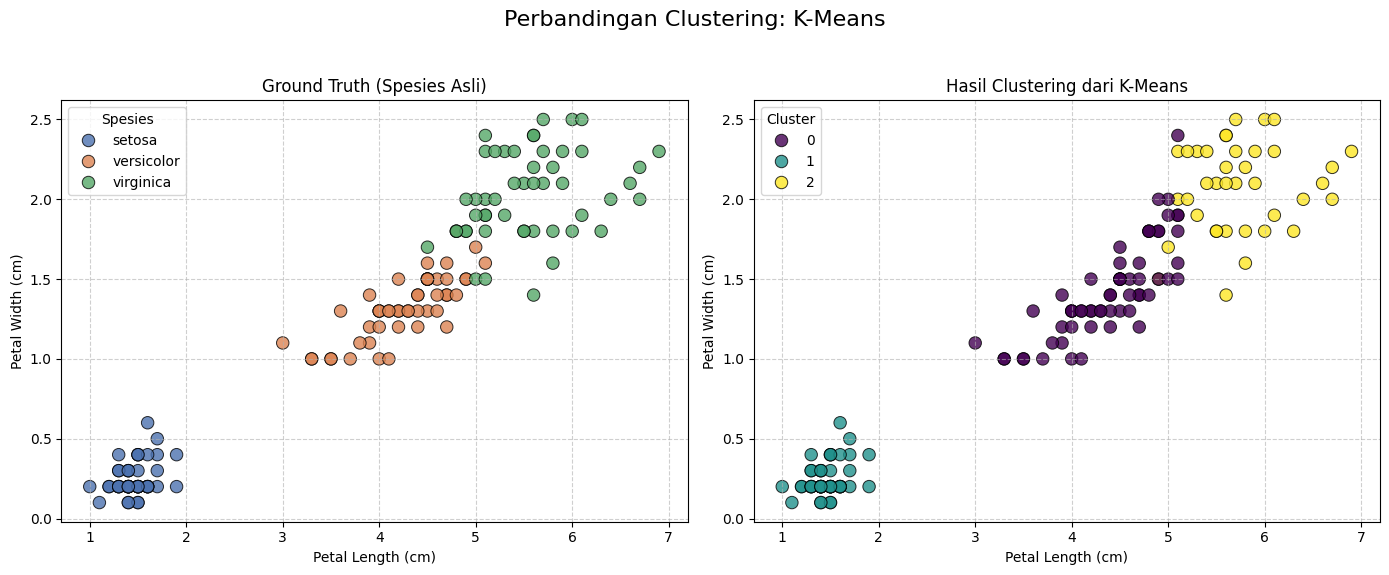

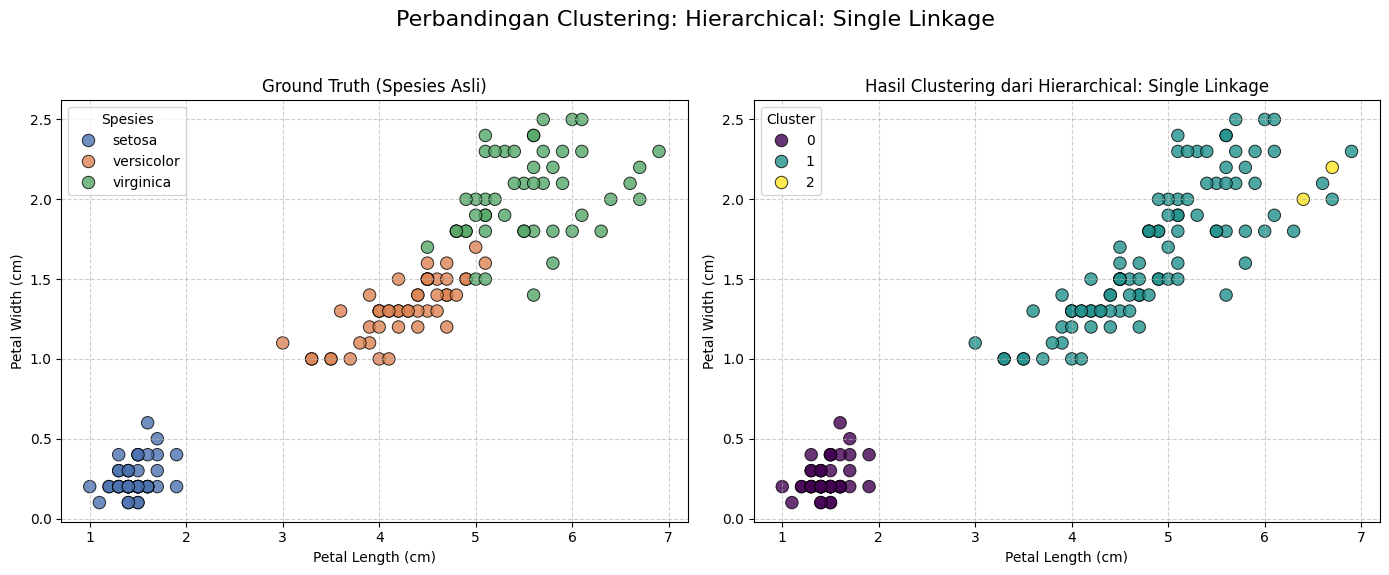

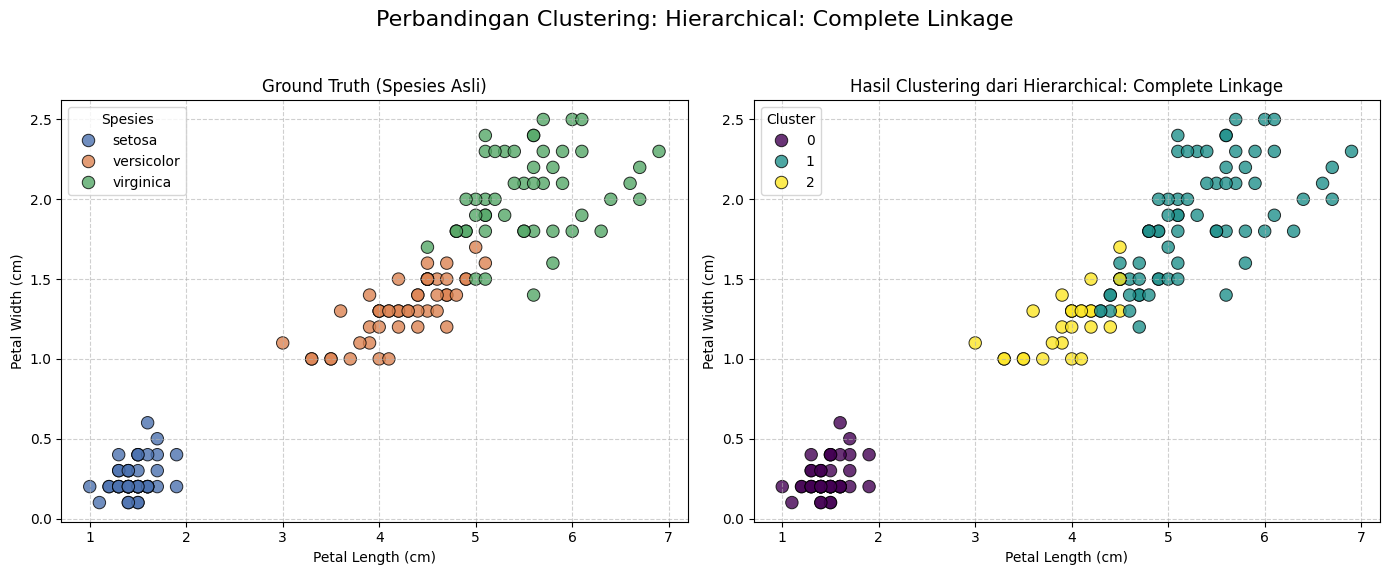

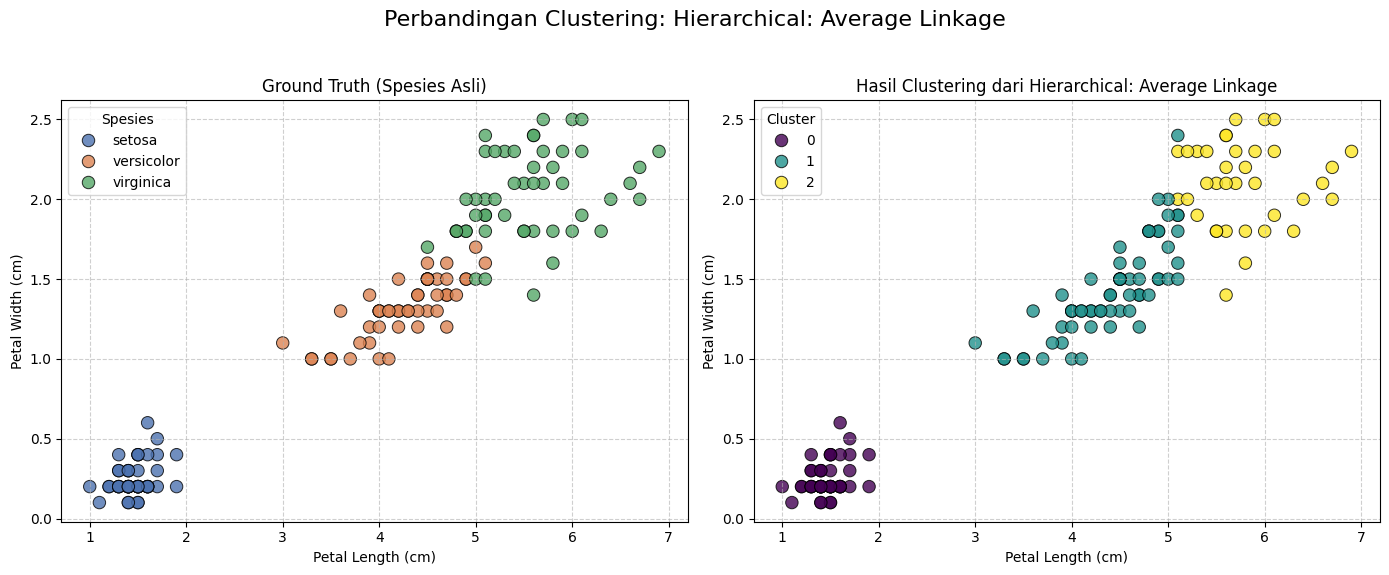

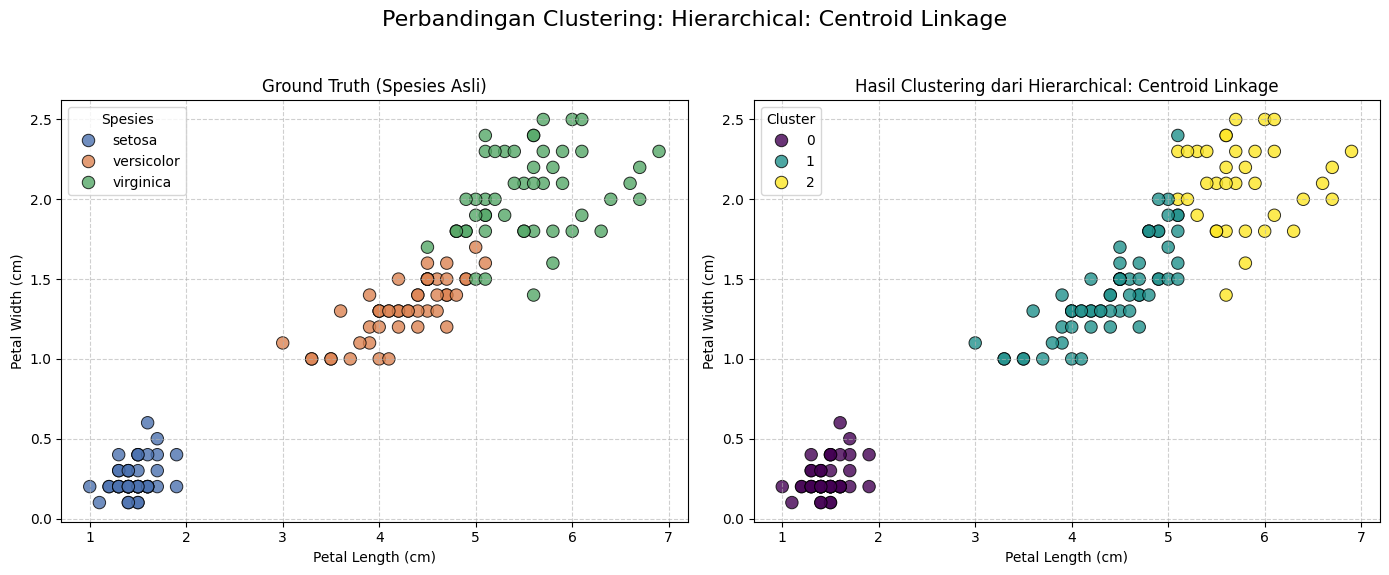

In [14]:
comparison_df = pd.DataFrame({
    'Spesies Asli': y_true_names,
    'Label Asli (int)': y_true,
    'Cluster K-Means': kmeans_labels
})
print("\nContoh Perbandingan Label Asli dengan Hasil K-Means (10 data acak):")
print(comparison_df.sample(10, random_state=1))

print("\nMenampilkan plot perbandingan hasil clustering...")
plot_clusters(X, y_true_names, kmeans_labels, "K-Means")
plot_clusters(X, y_true_names, single_labels, "Hierarchical: Single Linkage")
plot_clusters(X, y_true_names, complete_labels, "Hierarchical: Complete Linkage")
plot_clusters(X, y_true_names, average_labels, "Hierarchical: Average Linkage")
plot_clusters(X, y_true_names, centroid_labels, "Hierarchical: Centroid Linkage")

plt.show()

Analisa:
Kode tersebut digunakan untuk membandingkan hasil pengelompokan algoritma K-Means dengan label asli pada dataset Iris serta menampilkan visualisasi dari seluruh metode clustering yang diuji. Pertama, dibuat sebuah *DataFrame* berisi spesies asli, label numerik, dan hasil cluster K-Means agar dapat diamati kesesuaiannya. Kemudian, ditampilkan sepuluh contoh data acak untuk melihat perbedaan label asli dan hasil clustering secara langsung. Setelah itu, fungsi `plot_clusters` digunakan untuk memvisualisasikan perbandingan hasil clustering antara label asli dengan keluaran dari K-Means maupun setiap metode *Hierarchical Clustering* (Single, Complete, Average, dan Centroid Linkage). Setiap grafik menampilkan dua tampilan, yaitu persebaran data berdasarkan spesies asli dan hasil pengelompokan algoritma. Bagian akhir dengan `plt.show()` menampilkan seluruh grafik sehingga perbedaan pola antar metode dapat diamati dengan jelas.
